# Setup

## Load data and imports

### Run the Data Preprocessing notebook once to import the get_data method

In [19]:
%run data_preprocessing.ipynb

### Run the Data Evaluation notebook once to import the show_evaluation method

In [20]:
%run data_evaluation.ipynb

In [21]:
import numpy as np
import pandas as pd
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## Get test and train data

In [22]:
# for get_data
enable_feature_engineering = True
enable_outlier_handling = True
normalize = 'minmax'
use_one_hot_encoding = True
split_size = (0.9, 0.0, 0.1)

In [23]:
y_train, x_train, y_val, x_val, y_test, x_test = get_data(enable_feature_engineering, enable_outlier_handling, normalize, use_one_hot_encoding, split_size)

Dropped 24 duplicate rows.
Dropped 86 rows -> height to low.
Dropped 1 rows -> height to high.
Dropped 2 rows -> weight to low.
Dropped 0 rows -> weight to high.
Dropped 186 rows -> systolic bp to low.
Dropped 47 rows -> systolic bp to high.
Dropped 40 rows -> diastolic bp to low.
Dropped 948 rows -> diastolic bp to high.
Dropped 103 rows -> sytolic bp was lower than diastolic.


# Model

## Create and train the model

In [24]:
#read in data
dtrain = xgb.DMatrix(data=x_train, label=y_train)
dtest = xgb.DMatrix(data=x_test, label=y_test)

In [25]:
model = XGBClassifier()
model.fit(x_train, y_train)

print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


# Evaluation

## Prediction

In [26]:
y_prob = model.predict(x_test.astype('float32'))
y_pred = np.round(y_prob)

Precision Score:
0.7524943675571291

Recall Score:
0.6958333333333333

F1-Score:
0.7230555126024432

Confusion Matrix:

        Healthy Sick
Healthy      TN   FP
Sick         FN   TP

         Healthy  Sick
Healthy     2728   769
Sick        1022  2338



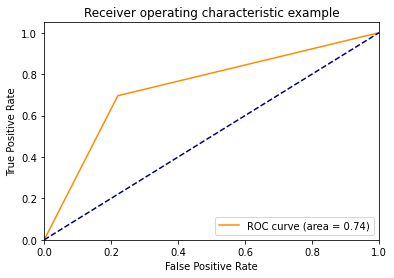


ROC Score:
0.7379652797636068


In [27]:
show_evaluation(y_test, y_pred, y_prob)

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.88%


In [ ]:
from graphviz import Digraph
xgb.plot_tree(model, num_trees=0)
plt.show()

## Most important variables

In [ ]:
xgb.plot_importance(model)
